In [1]:
library(ggplot2)#绘图包
library(ggpubr)#基于ggplot2的可视化包，主要用于绘制符合出版要求的图形
library(ggsignif)#用于P值计算和显著性标记
library(tidyverse)#数据预处理

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.0     ✔ stringr 1.5.1
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   1.0.2     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



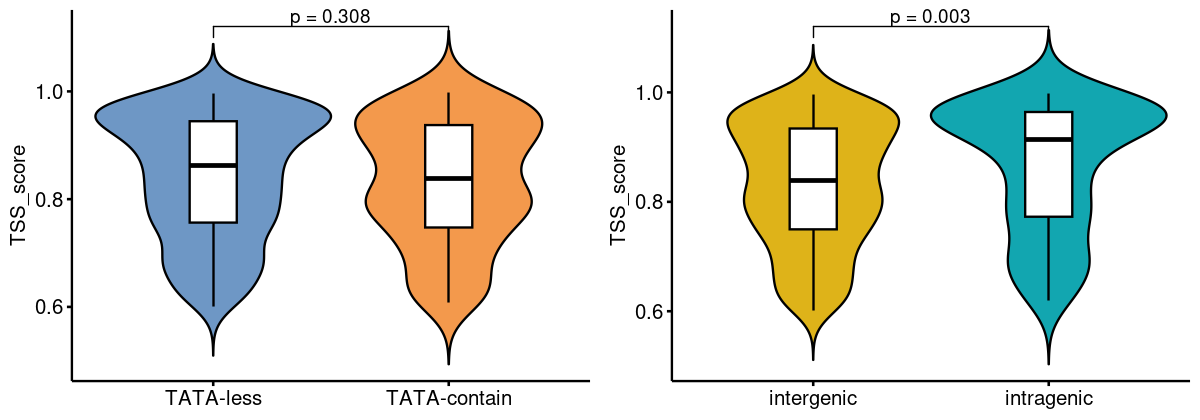

In [2]:
options(repr.plot.height=3.5,repr.plot.width=10)
TATA_promoter_inter_intra <- read.table("~/mirnome_data/Plot/miRNA_TSS_score.tsv",sep = "\t",header = 1)
test_result1 <- t.test(TSS_score ~ category, data = TATA_promoter_inter_intra)
annotation_text1 <- sprintf("p = %.3f", test_result1$p.value)


p1 <- ggviolin(TATA_promoter_inter_intra, "category", "TSS_score", fill = "category",
               palette = c("#6E97C5", "#F3994C"),
               add = "boxplot", add.params = list(fill = "white")) +
  geom_signif(comparisons = list(c("TATA-less", "TATA-contain")),
              map_signif_level = TRUE, test = t.test, y_position = c(1.1, 1.2, 1.3),
              tip_length = c(0.05, 0.05), size = 0.3, color = "black",
              annotations = annotation_text1) +
  theme(panel.background = element_blank(),
        axis.line = element_line(),
        legend.position = 'none',
        plot.title = element_text(size = 14))+labs(x = NULL) 


test_result2 <- t.test(TSS_score ~ type, data = TATA_promoter_inter_intra)
annotation_text2 <- sprintf("p = %.3f", test_result2$p.value)


p2 <- ggviolin(TATA_promoter_inter_intra, "type", "TSS_score", fill = "type",
               palette = c("#DEB319", "#12A6B0"),
               add = "boxplot", add.params = list(fill = "white")) +
  geom_signif(comparisons = list(c("intergenic", "intragenic")),
              map_signif_level = TRUE, test = t.test, y_position = c(1.1, 1.2, 1.3),
              tip_length = c(0.05, 0.05), size = 0.3, color = "black",
              annotations = annotation_text2) +
  theme(panel.background = element_blank(),
        axis.line = element_line(),
        legend.position = 'none',
        plot.title = element_text(size = 14))+labs(x = NULL) 


gridExtra::grid.arrange(p1, p2, ncol = 2)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 10 rows containing non-finite values (`stat_density()`).”


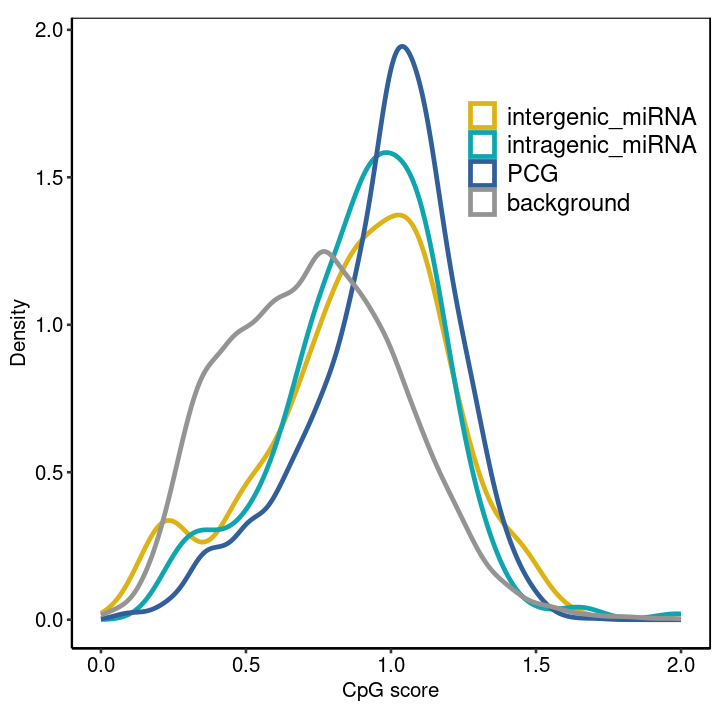

In [3]:
options(repr.plot.height=6,repr.plot.width=6)

CpG <- read.table("~/mirnome_data/Plot/CpG_score.tsv",sep = "\t",header = 1)
CpG$category <- factor(CpG$category,levels=c('intergenic_miRNA','intragenic_miRNA','PCG','background'))
colors <- setNames(c("#315F99","#DDB217","#0FA5B0","#949493"),c('PCG','intergenic_miRNA','intragenic_miRNA','background'))
p2 <- ggplot(data = CpG, aes(x = V4, color = factor(category))) +
  geom_density(adjust = 1, alpha = 0.2, size = 1) +  # 调整透明度以添加阴影
  scale_color_manual(values = colors,name="") +
  labs(color = "Your Legend Title", fill = "Your Legend Title") +  # 修改图例标题
  theme_pubr() + 
  theme(panel.border = element_rect(colour = "black", fill = NA)) +
  ylab("Density") +
  xlab("CpG score")+xlim(0,2)

x_min <- min(CpG$V4, na.rm = TRUE)
x_max <- 2
densities <- lapply(split(CpG$V4, CpG$category), density)
y_max <- max(sapply(densities, function(x) max(x$y)))
y_min <- min(sapply(densities, function(x) min(x$y)))
p2 <- p2+coord_fixed(ratio = (x_max-x_min)/(y_max-y_min))+ theme(legend.position = c(0.8, 0.8),legend.text = element_text(size = 14))
p2 


Warning message:
“Removed 20 rows containing non-finite values (`stat_density()`).”


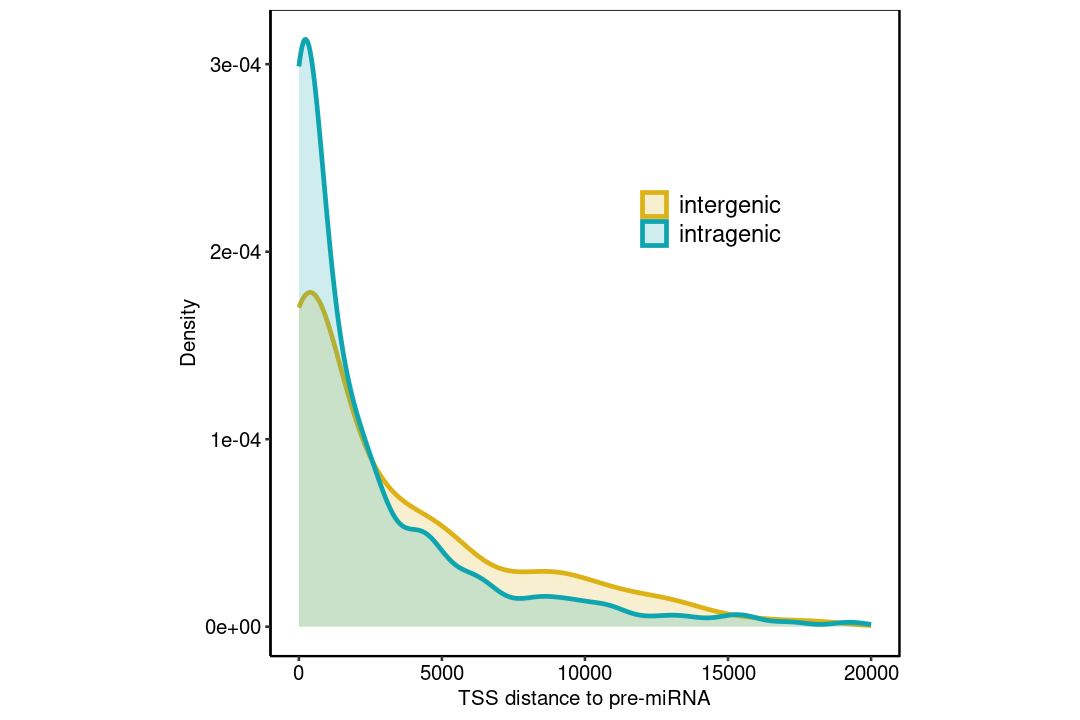

In [4]:
options(repr.plot.width=9)
miRNA_tss <- readRDS("~/mirnome_data/Plot/miRNA.rds")
colors <- setNames(c("#DDB217","#0FA5B0"),c('intergenic','intragenic'))
p4 <- ggplot(data = miRNA_tss, aes(x = abs(V9), color = factor(type),fill=factor(type))) +
  geom_density(adjust = 1, alpha = 0.2, size = 1) +  # 调整透明度以添加阴影
  scale_color_manual(values = colors,name="") + scale_fill_manual(values = colors,name="")+
  theme_pubr() + 
  theme(panel.border = element_rect(colour = "black", fill = NA)) +
  ylab("Density") +
  xlab("TSS distance to pre-miRNA")
x_min <- min(abs(miRNA_tss$V9), na.rm = TRUE)
x_max <- 20000
densities <- lapply(split(abs(miRNA_tss$V9), miRNA_tss$type), density)
y_max <- max(sapply(densities, function(x) max(x$y)))
y_min <- min(sapply(densities, function(x) min(x$y)))
p4 <- p4+xlim(0,x_max)+coord_fixed(ratio = (x_max-x_min)/(y_max-y_min))+ 
                    theme(legend.position = c(0.7, 0.7),legend.text = element_text(size = 14))
p4